In [62]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Метрики оценки качества
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
df = pd.read_csv('S05-hw-dataset.csv')

In [64]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [66]:
df.describe() # базовые статистики

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [67]:
df['default'].value_counts(normalize=True) # видим дисбаланс целевых значений приблизительно 18 процентов

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

# Краткая фиксация наблюдений
- 3000 объектов в датасете с 17 признаками.
- При анализе базовых статистик явных аномалий выявлено не было. Единственный смущающий момент это минимальное значение cheсking_balance у одного из объектов, однако в описании датасета в репозитории на гитхабе было написано, что данный столбец может быть отрицательным, поэтому всё хорошо
- в распределении таргета (балансе классов) столбца default был выявлен дисбаланс приблизительно в 18 процентов

# Разделение таргета и признаков

In [68]:
X = df.drop(columns=['client_id', 'default']) # Берём с датасета все признаки кроме айди клиента и таргета
y = df['default']

# Разбиение на обучающую и тестовую выборку

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Обучаем бейзлайн модель

In [70]:
# Задаём модель
baseline_most_freq = DummyClassifier(strategy='most_frequent', random_state=42)

# Обучаем модель
baseline_most_freq.fit(X_train, y_train)

# Делаем предсказания по тестовым данным
y_pred_test = baseline_most_freq.predict(X_test)
y_pred_proba_test = baseline_most_freq.predict_proba(X_test)[:, 1]  # вероятности класса 1

# Проверяем на метриках accuracy и ROC AUC

In [71]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_test):.4f}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba_test):.4f}')

Accuracy: 0.5893
ROC AUC: 0.5000


# Итог бейзлайна и его метрик и выводы

- Accuracy нам показала, что около 59 процентов всей выборки предсказывается верно, а метрика ROC AUC, равная 0.5 (50%), показывает вероятность того, что случайно выбранный объект положительного класса получит от модели более высокую принадлежность классу 1, чем случайно выбранный объект класса 0.
- Бейзлайн - это так называемая точка отсчёта, самая базовая модель. Она нам нужна для того, чтобы сравнивать все последующие модели с ней и для понимания, нужна ли вообще модель так таковая, т.к. бейзлайна может даже и хватать

# Логистическая регрессия и подбор гиперпараметров

## Построение Pipeline

In [72]:
pipe = Pipeline([
    ('scaler', StandardScaler()), # Стандартизация признаков к нулевому среднему и единичному стандартному отклонению
    ('logreg', LogisticRegression(
        max_iter=10000,
        random_state=42,
        solver="lbfgs" # один из солверов лог регрессии (разные регуляризации и виды градиентных спусков)
        ))
])

## GridSearchCV - поиск гиперпараметров с кросс-валидацией

In [73]:
grid_search = GridSearchCV(
    estimator=pipe, # выбор модели/пайплайна
    param_grid={
        'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'logreg__penalty': ['l1', 'l2'],
        'logreg__solver': ['liblinear', 'saga']
        }, # сетка параметров
    scoring='roc_auc', # Критерий выбора лучшего параметра
    cv=5, # Сколько фолдов на кросс-валидации (типо вся выборка делится на 5 частей и потом 1 часть это валидационная, а остальные 4 это обучающая, и так 5 раз попеременно)
    n_jobs=-1, # Кол-во параллельных процессов, -1 означает использовать все доступные ядра процессора
    verbose=1 # Сколько информации выводить в консоль во время работы, от 0 до 3
)

## Обучение на тренировочной выборке

In [74]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\vgutu\.conda\envs\dsfb\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\vgutu\.conda\envs\dsfb\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'logreg__C': [0.01, 0.1, ...], 'logreg__penalty': ['l1', 'l2'], 'logreg__solver': ['liblinear', 'saga']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is

## Выводим лучшие параметры и score на кросс-валлидации

In [75]:
print("Лучшие параметры:", grid_search.best_params_)
print(f"Лучший ROC AUC на CV: {grid_search.best_score_:.4f}")

Лучшие параметры: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Лучший ROC AUC на CV: 0.8638


## Лучшая модель

In [76]:
best_model = grid_search.best_estimator_

## Предсказания на тестовой выборке

In [77]:
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

## Метрики на тестовой выборке

In [78]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC:  {roc_auc_score(y_test, y_pred_prob):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7933
ROC AUC:  0.8658

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       442
           1       0.78      0.69      0.73       308

    accuracy                           0.79       750
   macro avg       0.79      0.78      0.78       750
weighted avg       0.79      0.79      0.79       750

Confusion Matrix:
[[383  59]
 [ 96 212]]


## График ROC AUC

График сохранён по пути: figures/roc_curve.png


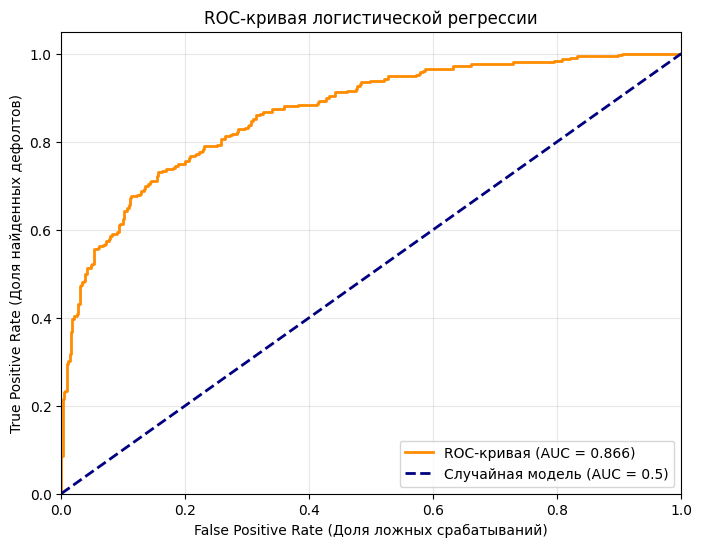

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# 2. Считаем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 3. Считаем AUC (площадь под кривой)
roc_auc = auc(fpr, tpr)  # или roc_auc_score(y_test, y_pred_proba)

# 4. Строим график
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Доля ложных срабатываний)')
plt.ylabel('True Positive Rate (Доля найденных дефолтов)')
plt.title('ROC-кривая логистической регрессии')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 5. Сохраняем график в нужную папку
# Путь: figures/
save_path = 'figures/roc_curve.png'

# Если папки нет — создадим её автоматически
import os
os.makedirs(os.path.dirname(save_path), exist_ok=True)

plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранён по пути: {save_path}")

# 6. Показываем график в ноутбуке
plt.show()

## Сравнение бейзлайна и логистической регрессии


In [82]:
# Сводная таблица сравнения моделей
comparison_data = {
    'Модель': ['DummyClassifier (baseline)', 'LogisticRegression (best)'],
    'Accuracy': [0.5893, 0.7933],
    'ROC AUC': [0.5000, 0.8658],
    'Лучшие параметры': [
        'strategy=most_frequent',
        'C=0.1, penalty=l1, solver=liblinear'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Прирост Accuracy'] = comparison_df['Accuracy'].diff().fillna(0)
comparison_df['Прирост ROC AUC'] = comparison_df['ROC AUC'].diff().fillna(0)

# Форматируем вывод
comparison_df_display = comparison_df.copy()
comparison_df_display['Accuracy'] = comparison_df_display['Accuracy'].apply(lambda x: f'{x:.4f}')
comparison_df_display['ROC AUC'] = comparison_df_display['ROC AUC'].apply(lambda x: f'{x:.4f}')
comparison_df_display['Прирост Accuracy'] = comparison_df_display['Прирост Accuracy'].apply(lambda x: f'+{x:.4f}' if x > 0 else '-')
comparison_df_display['Прирост ROC AUC'] = comparison_df_display['Прирост ROC AUC'].apply(lambda x: f'+{x:.4f}' if x > 0 else '-')

comparison_df_display.set_index('Модель', inplace=True)
comparison_df_display


,Accuracy,ROC AUC,Лучшие параметры,Прирост Accuracy,Прирост ROC AUC
Модель,,,,,
DummyClassifier (baseline),0.5893,0.5000,strategy=most_frequent,-,-
LogisticRegression (best),0.7933,0.8658,"C=0.1, penalty=l1, solver=liblinear",+0.2040,+0.3658


## Текстовый отчёт: выводы по результатам моделирования

**1. Сравнение качества моделей:**

Бейзлайн-модель (DummyClassifier со стратегией `most_frequent`) показала Accuracy = 0.5893 и ROC AUC = 0.5000. Это означает, что модель не способна различать классы — ROC AUC = 0.5 эквивалентен случайному угадыванию. Логистическая регрессия, напротив, продемонстрировала значительно лучшие результаты: Accuracy = 0.7933 и ROC AUC = 0.8658.

**2. Рост метрик:**

- **Accuracy** выросла на **+0.204** (с 58.93% до 79.33%), что составляет относительный прирост около **34.6%**.
- **ROC AUC** выросла на **+0.3658** (с 0.5 до 0.8658), что составляет относительный прирост около **73.2%**. Это говорит о том, что логистическая регрессия существенно лучше ранжирует объекты по вероятности дефолта.

**3. Влияние регуляризации (параметр C):**

В ходе GridSearchCV были протестированы значения C = [0.01, 0.1, 1.0, 10.0, 100.0]. Лучшим оказалось значение **C = 0.1**, что соответствует относительно сильной регуляризации. Это означает, что модель с более жёсткими ограничениями на веса коэффициентов лучше обобщается на новых данных, предотвращая переобучение. L1-регуляризация (penalty='l1') также способствует отбору признаков, обнуляя менее значимые коэффициенты.

**4. Выводы:**

1. **Логистическая регрессия значительно превосходит бейзлайн** по обеим ключевым метрикам. Это подтверждает, что для задачи предсказания дефолта по кредиту необходима полноценная модель машинного обучения, а не простая эвристика.

2. **Умеренная регуляризация (C = 0.1) оптимальна** для данной задачи — слишком слабая регуляризация (большие значения C) может привести к переобучению, а слишком сильная (очень малые C) — к недообучению.

3. **Логистическая регрессия является разумным выбором** для данной задачи бинарной классификации: она интерпретируема (можно анализировать веса признаков), быстро обучается и достигает ROC AUC ≈ 0.87, что является хорошим показателем для задач кредитного скоринга.
